**STOCK PRICE PREDICTION - MINI PROJECT**

# Stock Price Prediction Project
## Step 1: Data Collection
This notebook collects historical stock price data for Apple (AAPL) using the `yfinance` library.

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
# Download Apple stock data from 2018 to 2023
data = yf.download('AAPL', start='2018-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
print(data.head())

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2018-01-02  40.479847  40.489249  39.774869  39.986364  102223600
2018-01-03  40.472782  41.017967  40.409337  40.543281  118071600
2018-01-04  40.660782  40.764179  40.437540  40.545634   89738400
2018-01-05  41.123722  41.210668  40.665487  40.757134   94640000
2018-01-08  40.970974  41.267063  40.872274  40.970974   82271200


In [ ]:
# Save the data to a CSV file
data.to_csv('AAPL_stock_data.csv')

## Step 2: Preprocess the Data
Preprocessing involves cleaning, transforming, and organizing the data so that it can be used effectively in model.


In [ ]:
import pandas as pd


In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
print(data.head())

   1       Date      Close       High        Low       Open     Volume  MA_7  \
0  2 2018-01-02  40.479847  40.489249  39.774869  39.986364  102223600   NaN   
1  3 2018-01-03  40.472782  41.017967  40.409337  40.543281  118071600   NaN   
2  4 2018-01-04  40.660782  40.764179  40.437540  40.545634   89738400   NaN   
3  5 2018-01-05  41.123722  41.210668  40.665487  40.757134   94640000   NaN   
4  6 2018-01-08  40.970974  41.267063  40.872274  40.970974   82271200   NaN   

      Target  
0  40.472782  
1  40.660782  
2  41.123722  
3  40.970974  
4  40.966278  


In [ ]:
data.to_csv('AAPL_stock_data.csv')

In [ ]:
from google.colab import files
files.download('AAPL_stock_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data.to_csv('/content/drive/My Drive/AAPL_stock_data.csv')

In [ ]:
# Load the .xlsx file
data = pd.read_excel('AAPL_stock_data.xlsx')

# Display the first few rows of the data
print(data.head())


   1       Date      Close       High        Low       Open     Volume
0  2 2018-01-02  40.479847  40.489249  39.774869  39.986364  102223600
1  3 2018-01-03  40.472782  41.017967  40.409337  40.543281  118071600
2  4 2018-01-04  40.660782  40.764179  40.437540  40.545634   89738400
3  5 2018-01-05  41.123722  41.210668  40.665487  40.757134   94640000
4  6 2018-01-08  40.970974  41.267063  40.872274  40.970974   82271200


In [ ]:
data.to_csv('AAPL_stock_data_fixed.csv')


In [ ]:
print(data.isnull().sum())  # Check for missing values
data = data.dropna()  # Drop rows with missing values


1         0
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [ ]:
# Example: Create a 7-day moving average
data['MA_7'] = data['Close'].rolling(window=7).mean()

In [ ]:
data['Target'] = data['Close'].shift(-1)  # Next day's closing price

In [ ]:
print(data.columns)

Index([1, 'Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'MA_7', 'Target'], dtype='object')


In [ ]:
# Convert column names to strings
data.columns = data.columns.astype(str)

# Check the column names again
print(data.columns)

Index(['1', 'Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'MA_7',
       'Target'],
      dtype='object')


In [ ]:
# Create the target variable (e.g., next day's closing price)
data['Target'] = data['Close'].shift(-1)

# Drop the last row (since it won't have a target value)
data = data.dropna()

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Convert DateTime column to string or drop it
if 'Date' in data.columns:
    data = data.drop(columns=['Date'])  # Drop Date column
    # OR
    # data['Date'] = data['Date'].astype(str)  # Convert Date column to string if needed

# Initialize the scaler
scaler = MinMaxScaler()

# Select only numeric columns (excluding target variable)
numeric_columns = data.select_dtypes(include=['number']).columns
numeric_columns = numeric_columns.drop('Target')  # Exclude target column

# Scale the features
scaled_features = scaler.fit_transform(data[numeric_columns])

# Convert back to DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=numeric_columns, index=data.index)

# Add the target variable back
scaled_data['Target'] = data['Target'].values

# Display the first few rows
print(scaled_data.head())


           1     Close      High       Low      Open    Volume      MA_7  \
6   0.000000  0.048575  0.042762  0.047716  0.043743  0.154974  0.036085   
7   0.000799  0.050180  0.044690  0.050179  0.046058  0.100878  0.036805   
8   0.001599  0.053114  0.047719  0.052096  0.048632  0.169880  0.037965   
9   0.002398  0.051655  0.051008  0.052906  0.051417  0.212279  0.038719   
10  0.003197  0.056372  0.050782  0.051138  0.048583  0.261558  0.039697   

       Target  
6   41.189518  
7   41.614857  
8   41.403358  
9   42.087181  
10  42.124779  


In [ ]:
# Save the scaled data to a CSV file
scaled_data.to_csv("scaled_stock_data.csv", index=False)
print("Scaled data saved successfully.")


Scaled data saved successfully.


In [ ]:
from sklearn.model_selection import train_test_split

# Define input features (X) and target variable (y)
X = scaled_data.drop(columns=['Target'])  # All columns except target
y = scaled_data['Target']  # Target column

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Print shapes to verify
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


X_train shape: (1001, 7), y_train shape: (1001,)
X_test shape: (251, 7), y_test shape: (251,)


In [ ]:
# Save training set
X_train.to_csv("X_train.csv", index=False)
y_train.to_csv("y_train.csv", index=False)

# Save testing set
X_test.to_csv("X_test.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("Train and test datasets saved successfully.")


Train and test datasets saved successfully.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

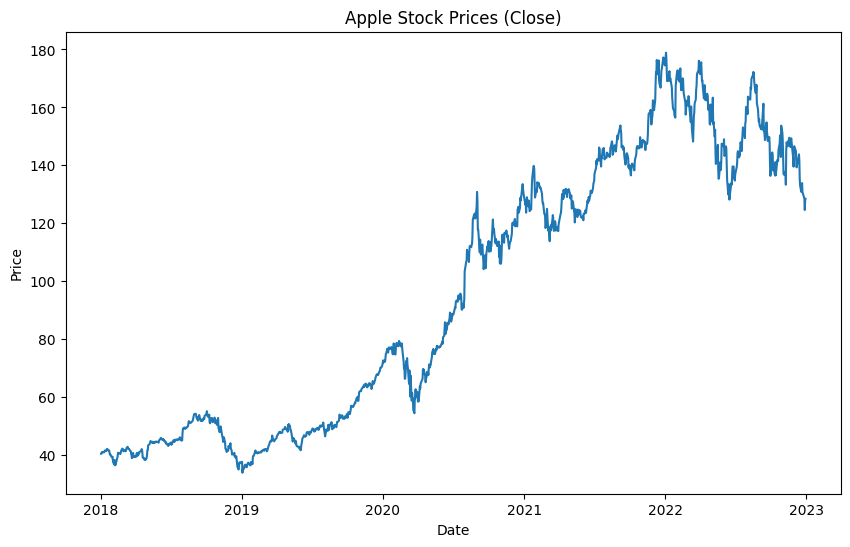

In [3]:
# Load the preprocessed data
data = pd.read_csv('AAPL_stock_data.csv', index_col='Date', parse_dates=True)

# Use the 'Close' column as the target variable
arima_data = data['Close']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(arima_data)
plt.title('Apple Stock Prices (Close)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(arima_data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpret the result
if result[1] > 0.05:
    print("The data is not stationary. Differencing is required.")
else:
    print("The data is stationary.")

ADF Statistic: -1.0638031949796105
p-value: 0.7292888886287633
Critical Values: {'1%': -3.4356048614183443, '5%': -2.8638605461891617, '10%': -2.5680054872544145}
The data is not stationary. Differencing is required.


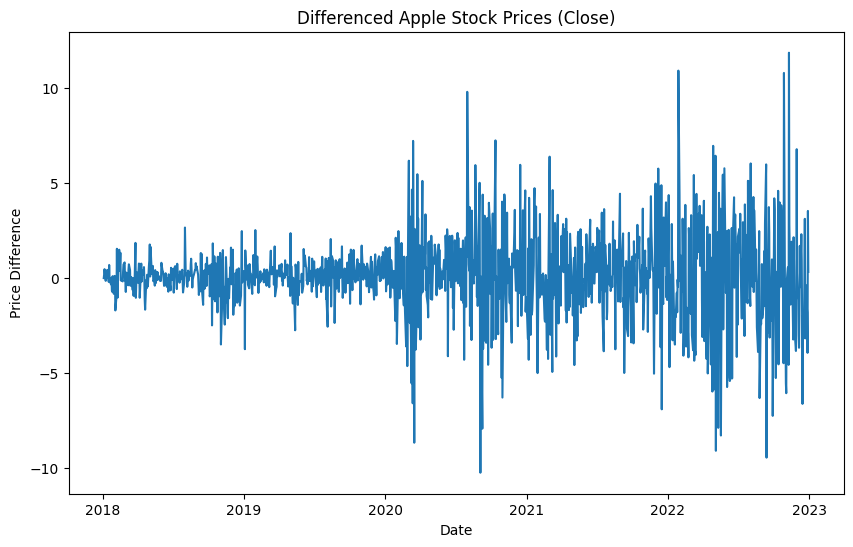

ADF Statistic (Differenced): -10.460325048496724
p-value (Differenced): 1.3643873622712428e-18


In [5]:
# Apply first-order differencing
arima_data_diff = arima_data.diff().dropna()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(arima_data_diff)
plt.title('Differenced Apple Stock Prices (Close)')
plt.xlabel('Date')
plt.ylabel('Price Difference')
plt.show()

# Check stationarity again
result_diff = adfuller(arima_data_diff)
print('ADF Statistic (Differenced):', result_diff[0])
print('p-value (Differenced):', result_diff[1])

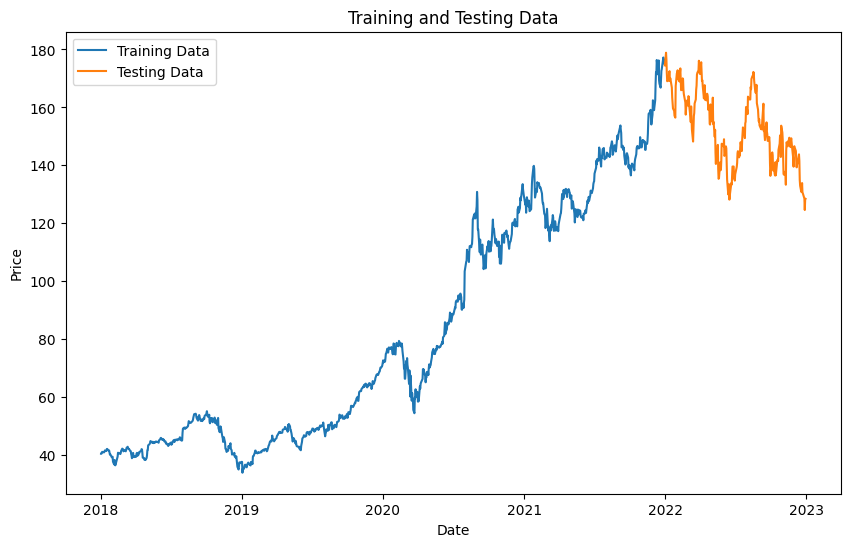

In [6]:
# Define the split point (e.g., 80% training, 20% testing)
split = int(len(arima_data) * 0.8)
train_data = arima_data[:split]
test_data = arima_data[split:]

# Plot the training and testing data
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Testing Data')
plt.title('Training and Testing Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [7]:
# Build the ARIMA model
arima_model = ARIMA(train_data, order=(5, 1, 0))  # Example: ARIMA(5, 1, 0)

# Train the model
arima_model_fit = arima_model.fit()

# Print the model summary
print(arima_model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1007
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1994.312
Date:                Mon, 10 Mar 2025   AIC                           4000.623
Time:                        09:48:35   BIC                           4030.106
Sample:                             0   HQIC                          4011.825
                               - 1007                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0892      0.022     -4.124      0.000      -0.132      -0.047
ar.L2          0.0219      0.019      1.137      0.255      -0.016       0.060
ar.L3         -0.0269      0.023     -1.181      0.2

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


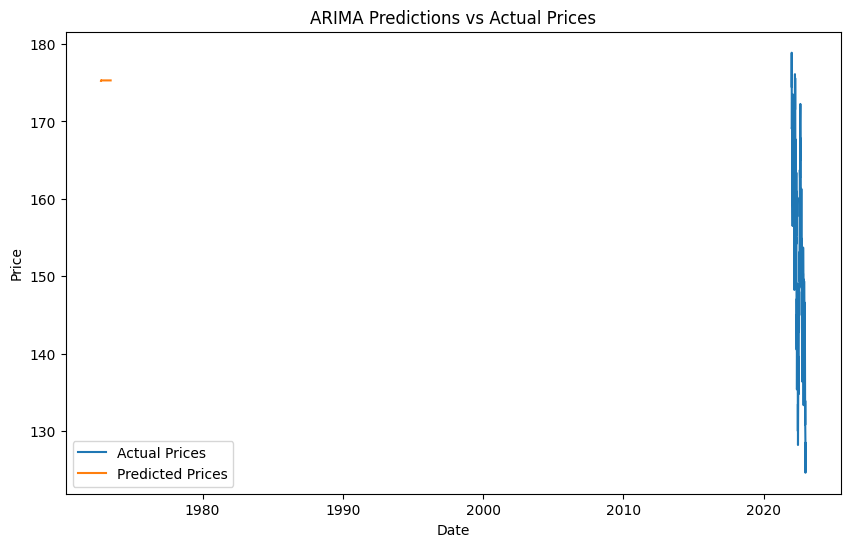

In [8]:
# Generate predictions
predictions = arima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, typ='levels')

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(test_data, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.title('ARIMA Predictions vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [9]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f"RMSE: {rmse}")

RMSE: 25.940295754744


In [10]:
import joblib

# Save the model
joblib.dump(arima_model_fit, 'arima_model.pkl')

# Load the model (for future use)
# arima_model_fit = joblib.load('arima_model.pkl')

['arima_model.pkl']